In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-bright')

import pickle
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing

from IPython.display import display
%load_ext memory_profiler
%load_ext line_profiler

In [2]:
def train_test_split(dataX, datay, proportion_train = .75):
    train_cutoff = int(np.floor(proportion_train*len(dataX)))

    X_train = dataX[:train_cutoff]
    X_test  = dataX[train_cutoff:]

    y_train = datay[:train_cutoff]
    y_test  = datay[train_cutoff:]

    return X_train, y_train, X_test, y_test

def feature_target_split(df,feature_names, target_name):
    X_data = df[feature_names].as_matrix()
    y_data = df[target_name].as_matrix()
    return X_data, y_data

[[ 0.00051559 -0.39399924]]
[-0.2385405]


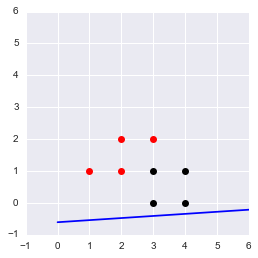

In [63]:
# unnormalized gives false result, see what happens to decision boundary when one axis is scaled
%matplotlib inline
np.random.seed(0)
scale_fac = 50
x0 = np.array([1,2,2,3]) * scale_fac
y0 = np.array([1,1,2,2])
df1 = pd.DataFrame({'x':x0, 'y':y0, 'label':0})

x1 = np.array([3,4,3,4]) * scale_fac
y1 = np.array([0,0,1,1])
df2 = pd.DataFrame({'x':x1, 'y':y1, 'label':1})

df = pd.concat([df1,df2])
df
######
X_data, y_data = feature_target_split(df,['x','y'],'label')
model = svm.LinearSVC()

model.fit(X_data,y_data)
print model.coef_
print model.intercept_

plt.plot(x0/ scale_fac,y0,'ro')
plt.plot(x1/ scale_fac,y1,'ko')

m = - model.coef_[0][0] / model.coef_[0][1]
c = - model.intercept_[0] / model.coef_[0][1]

xx = np.linspace(0,6*scale_fac)
yy = m* scale_fac* xx + c

plt.plot(xx, yy, 'b-')
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal', adjustable='box')

[[ 0.02157698 -1.06442345]]
[-0.04655108]


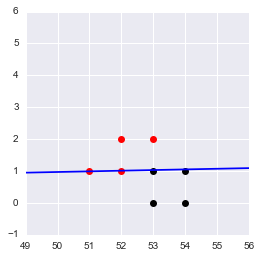

In [120]:
# unnormalized gives false result, see what happens to decision boundary when one axis is scaled
%matplotlib inline
np.random.seed(0)
scale_fac = 50

x0 = np.array([1,2,2,3]) + scale_fac
y0 = np.array([1,1,2,2])
df1 = pd.DataFrame({'x':x0, 'y':y0, 'label':0})

x1 = np.array([3,4,3,4]) + scale_fac
y1 = np.array([0,0,1,1])
df2 = pd.DataFrame({'x':x1, 'y':y1, 'label':1})

df = pd.concat([df1,df2])
df
######
X_data, y_data = feature_target_split(df,['x','y'],'label')
# model = svm.LinearSVC()
model = linear_model.LogisticRegression()

model.fit(X_data,y_data)
print model.coef_
print model.intercept_

plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'ko')

m = - model.coef_[0][0] / model.coef_[0][1]
c = - model.intercept_[0] / model.coef_[0][1]

xx = np.linspace(-5,6+scale_fac)
yy = m* xx + c

plt.plot(xx, yy, 'b-')
plt.xlim(-1+scale_fac, 6+scale_fac)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal', adjustable='box')

model.coef_ [[ 0.92450041 -1.01482232]]
model.intercept_ [-0.07189403]
scaler.scale_ [ 4.84122918  1.22474487]
scaler.mean_ [ 13.75   1.  ]
coef_:  [[ 0.19096398 -0.82859896]]


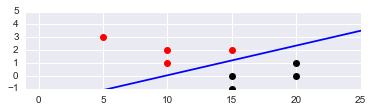

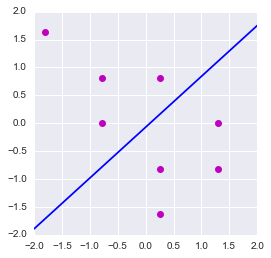

In [59]:
# effect of standardization / normalization to the decision boundary for LogisticRegression and SVM
np.random.seed(0)
scale_fac = 5
x0 = np.array([1,2,2,3])*scale_fac
y0 = np.array([3,1,2,2]).astype(float)
df1 = pd.DataFrame({'x':x0, 'y':y0, 'label':0})

x1 = np.array([3,4,3,4])*scale_fac
y1 = np.array([0,0,-1,1]).astype(float)
df2 = pd.DataFrame({'x':x1, 'y':y1, 'label':1})

df = pd.concat([df1,df2])
######
X_data, y_data = feature_target_split(df,['x','y'],'label')

scaler = preprocessing.StandardScaler().fit(X_data)

model = linear_model.LogisticRegression()
# model = svm.LinearSVC()

model.fit(scaler.transform(X_data),y_data)
print 'model.coef_', model.coef_
print 'model.intercept_', model.intercept_

print 'scaler.scale_', scaler.scale_
print 'scaler.mean_', scaler.mean_


plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'ko')

coef_ = model.coef_ / scaler.scale_ 
intercept_ =  - np.dot(coef_[0], scaler.mean_) + model.intercept_

print 'coef_: ', coef_
m = - coef_[0][0] / coef_[0][1] 
c = - intercept_[0] / coef_[0][1] 

xx = np.linspace(-10,60)
yy = m * xx + c

plt.plot(xx, yy, 'b-')
plt.xlim(-1, 5*scale_fac)
plt.ylim(-1, 5)

plt.gca().set_aspect('equal', adjustable='box')

# display(df)
########################
# normalized form
plt.figure()
temp = scaler.transform(X_data)
plt.plot(temp[:,0], temp[:,1], 'mo')

m = - model.coef_[0][0] / model.coef_[0][1] 
c = - model.intercept_[0] / model.coef_[0][1] 

xx = np.linspace(-2,2)
yy = m * xx + c
plt.plot(xx, yy, 'b-')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.gca().set_aspect('equal', adjustable='box')
########################


In [ ]:
model.coef_

/Users/sidz/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


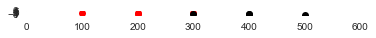

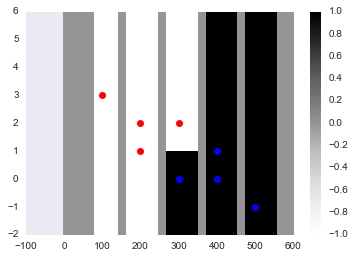

In [118]:
# default svc (non linear), unnormalized under scaling
%matplotlib inline
np.random.seed(0)
scale_fac = 100
x0 = np.array([1,2,2,3])*scale_fac
y0 = np.array([3,1,2,2])
df1 = pd.DataFrame({'x':x0, 'y':y0, 'label':0})

x1 = np.array([3,4,5,4])*scale_fac
y1 = np.array([0,0,-1,1])
df2 = pd.DataFrame({'x':x1, 'y':y1, 'label':1})

df = pd.concat([df1,df2])
######
X_data, y_data = feature_target_split(df,['x','y'],'label')
model = svm.SVC(gamma = scale_fac)

model.fit(X_data,y_data)
# print model.coef_
# print model.intercept_

plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'ko')

# m = - model.coef_[0][0] / model.coef_[0][1]
# c = - model.intercept_[0] / model.coef_[0][1]

xx = np.linspace(0,6*scale_fac)
# yy = m* scale_fac* xx + c

# plt.plot(xx, yy, 'b-')
plt.xlim(-1, 6* scale_fac)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal', adjustable='box')


##### plotting result

nxxx, nyyy = (30, 30)
xxx = np.linspace(-2, 600, nxxx)
yyy = np.linspace(-2, 6, nyyy)
xxx_mesh, yyy_mesh = np.meshgrid(xxx, yyy)

result = np.zeros((nxxx, nyyy))
for i in range(len(xxx_mesh)):
    for j in range(len(yyy_mesh)):
      if model.decision_function([[xxx_mesh[i][j], yyy_mesh[i][j]]])[0] > 0:
        result[i][j] = 1
      elif model.decision_function([[xxx_mesh[i][j], yyy_mesh[i][j]]])[0] == 0:
        result[i][j] = 0
      else:
        result[i][j] = -1
#       result[i][j] = model.decision_function([[xxx_mesh[i][j], yyy_mesh[i][j]]])[0]
#         print [xxx_mesh[i][j], yyy_mesh[i][j]]

plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plt.pcolor(xxx_mesh, yyy_mesh, result)
plt.colorbar()


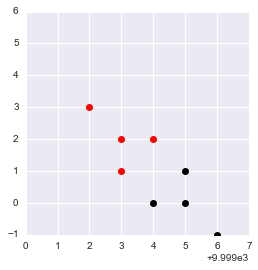

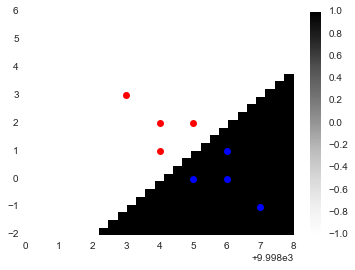

In [115]:
# default svc (non linear), unnormalized under translation
%matplotlib inline
np.random.seed(0)
scale_fac = 10000
x0 = np.array([1,2,2,3])+scale_fac
y0 = np.array([3,1,2,2])
df1 = pd.DataFrame({'x':x0, 'y':y0, 'label':0})

x1 = np.array([3,4,5,4])+scale_fac
y1 = np.array([0,0,-1,1])
df2 = pd.DataFrame({'x':x1, 'y':y1, 'label':1})

df = pd.concat([df1,df2])
######
X_data, y_data = feature_target_split(df,['x','y'],'label')
model = svm.SVC()

model.fit(X_data,y_data)
# print model.coef_
# print model.intercept_

plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'ko')

# m = - model.coef_[0][0] / model.coef_[0][1]
# c = - model.intercept_[0] / model.coef_[0][1]

xx = np.linspace(0,6+scale_fac)
# yy = m* scale_fac* xx + c

# plt.plot(xx, yy, 'b-')
plt.xlim(-1+scale_fac, 6+scale_fac)
plt.ylim(-1, 6)
plt.gca().set_aspect('equal', adjustable='box')


# ##### plotting result

nxxx, nyyy = (30, 30)
xxx = np.linspace(-2+scale_fac, 6+scale_fac, nxxx)
yyy = np.linspace(-2, 6, nyyy)
xxx_mesh, yyy_mesh = np.meshgrid(xxx, yyy)

result = np.zeros((nxxx, nyyy))
for i in range(len(xxx_mesh)):
    for j in range(len(yyy_mesh)):
      if model.decision_function([[xxx_mesh[i][j], yyy_mesh[i][j]]])[0] > 0:
        result[i][j] = 1
      elif model.decision_function([[xxx_mesh[i][j], yyy_mesh[i][j]]])[0] == 0:
        result[i][j] = 0
      else:
        result[i][j] = -1
#       result[i][j] = model.decision_function([[xxx_mesh[i][j], yyy_mesh[i][j]]])[0]
#         print [xxx_mesh[i][j], yyy_mesh[i][j]]

plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plt.pcolor(xxx_mesh, yyy_mesh, result)
plt.colorbar()
